<a href="https://colab.research.google.com/github/mmubashirm381/Heart-Disease-Prediction.ipynb/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline

import plotly.io as pio
from sklearn.impute import SimpleImputer

pio.templates.default = "plotly_white"

%matplotlib inline

#Models for scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
# Importing the dataset
df= pd.read_csv("https://raw.githubusercontent.com/Harikishan63/Data-Learnings-/main/heart_disease_uci.csv")


Description of the data
age : The individual's age in years
Sex: The individual's sex (taking male=1 and female =0)
cp: The chest pain experienced(value1: typical angina, value2: atypical angina, value3: non-anginal pain,: value 4: asymptomatic
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
ca: The number of major vessels (0-3)
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


**Target: Heart disease(0=no,1=yes)**

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


(920, 16)

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
# CHECKING FOR MISSING VALUES
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:
#Number of instances
num_instances = df.shape[0]
print(f"Number of instances: {num_instances}")

Number of instances: 920


In [ ]:
# b. Number of features
num_features = df.shape[1] - 1  # Excluding the target column
print(f"Number of features: {num_features}")

Number of features: 15


In [ ]:
# c. Number of instances from each class (malware/benign)
num_counts = df['num'].value_counts()  # Replace 'class' with your target column name
print("Number of instances from each class:")
print(num_counts)

Number of instances from each class:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [ ]:
# checking the percentage of missing values

(df.isna().sum()/len(df) *100).round(2).sort_values(ascending=False)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

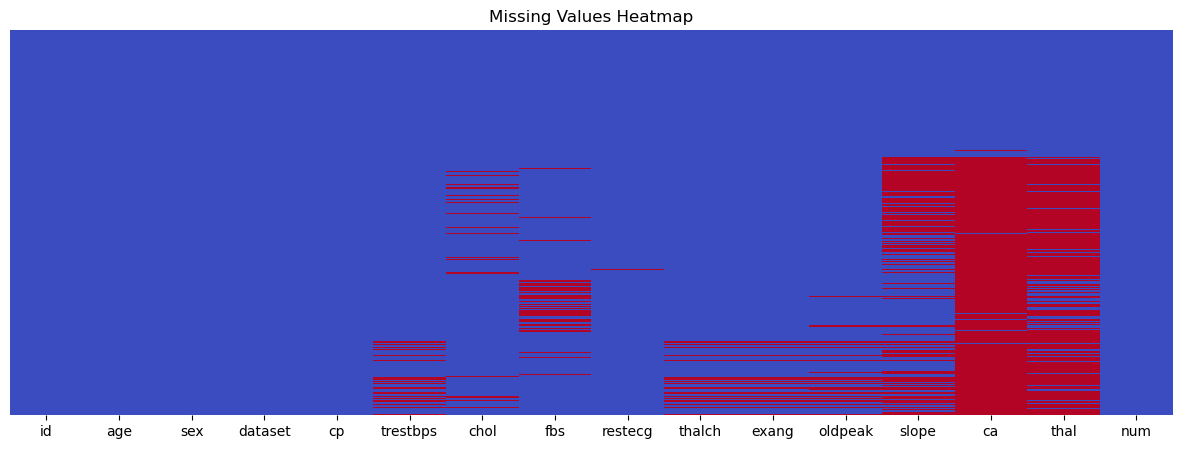

In [ ]:
#heatmap of the missing values

# setting the figure size
plt.figure(figsize=(15 , 5))
# plotting the heatmap
sns.heatmap(df.isna(), cbar=False , yticklabels=False, cmap='coolwarm')
# giving title
plt.title('Missing Values Heatmap')
# showing the plot
plt.show()

ca (possibly "number of major vessels colored by fluoroscopy"): This column has the highest concentration of missing values, indicating it is the most incomplete feature.
thal (possibly "thalassemia"): This column also has a high number of missing values.
Other columns such as chol (cholesterol), oldpeak, slope, and trestbps (resting blood pressure) have scattered missing values.
id, age, sex, dataset, cp, fbs, restecg, thalch, exang, num: These columns appear to have no missing data.

In [ ]:
# Handle missing values for visualization purposes
df = df.drop(columns=['slope', 'ca', 'thal'])  # Drop columns with high missing values
df = df.dropna()  # Drop rows with any remaining missing values

In [ ]:
# Define numerical and categorical columns
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']
# Impute missing values for numerical features
imputer = SimpleImputer(strategy='median')
df[numeric_features] = imputer.fit_transform(df[numeric_features])

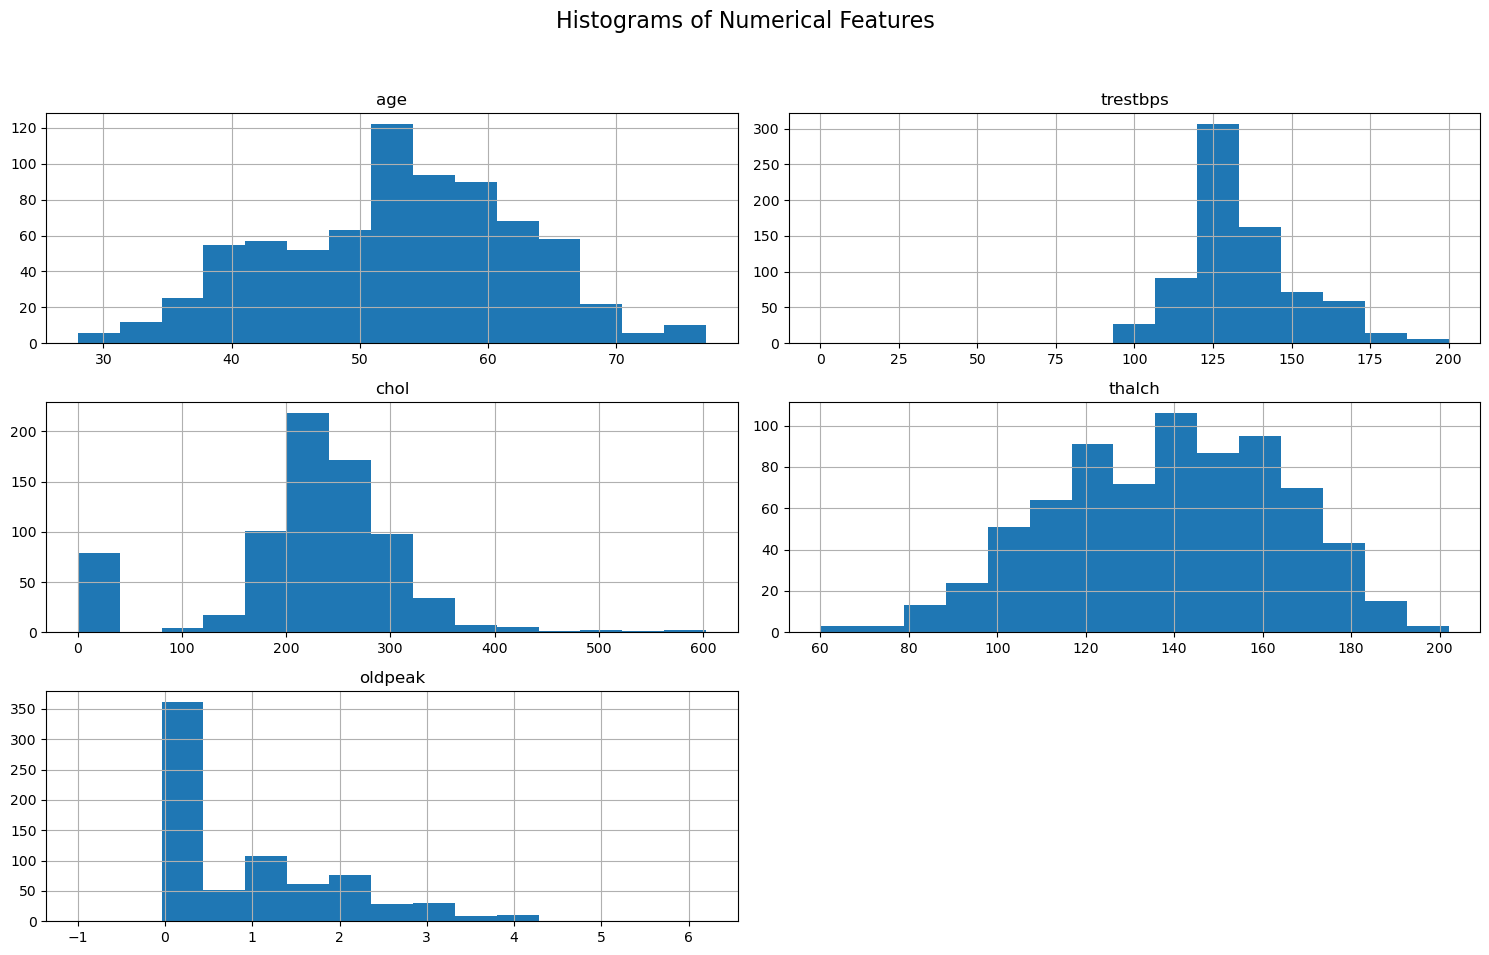

In [ ]:
# Histograms for numerical variables
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

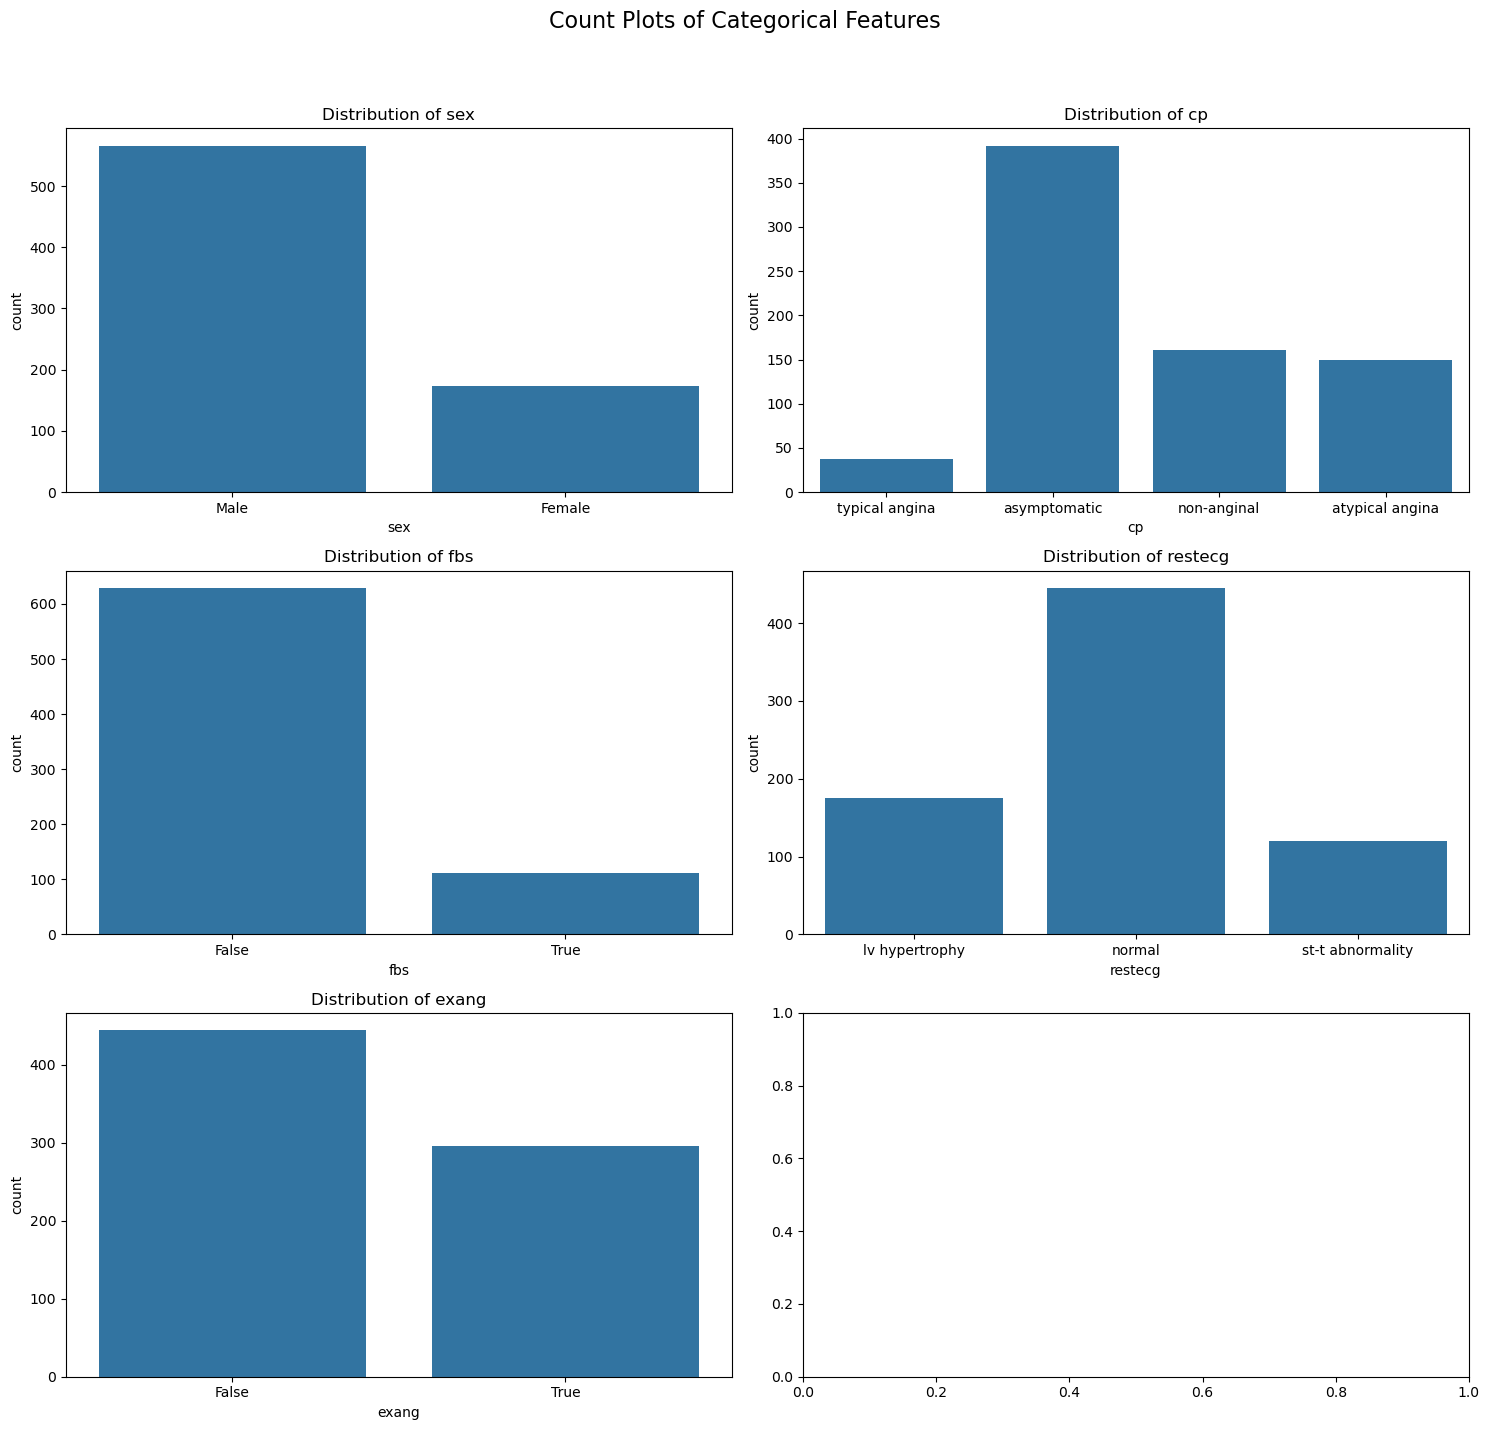

In [ ]:
# Count plots for categorical variables
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axs = axs.flatten()
for ax, col in zip(axs, categorical_features):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.suptitle('Count Plots of Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

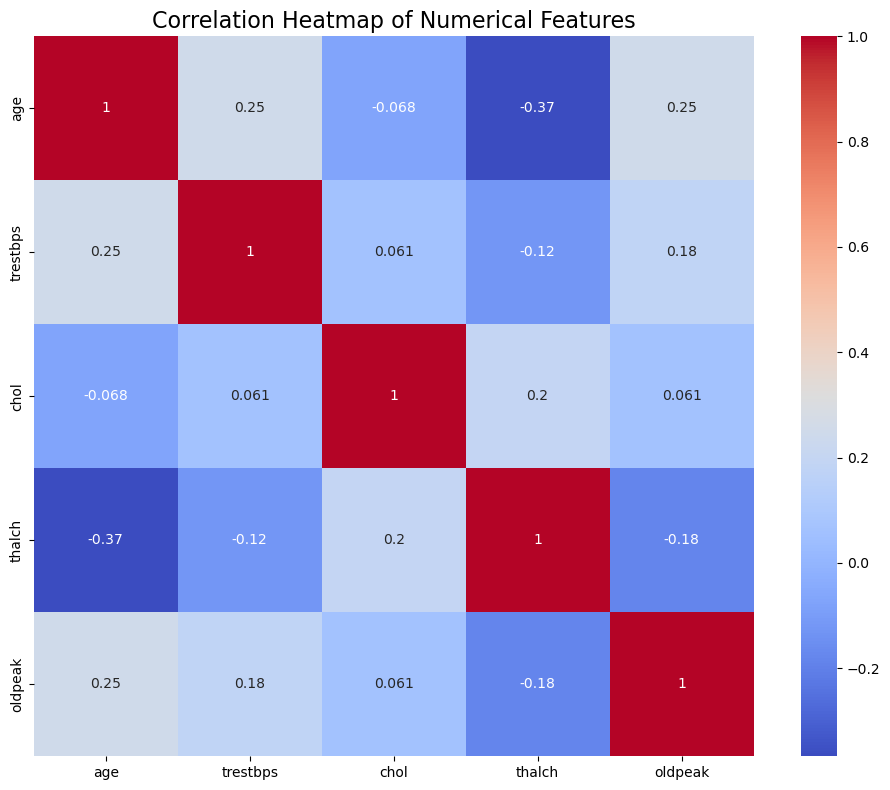

In [ ]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Pairplot of All Numerical Features:


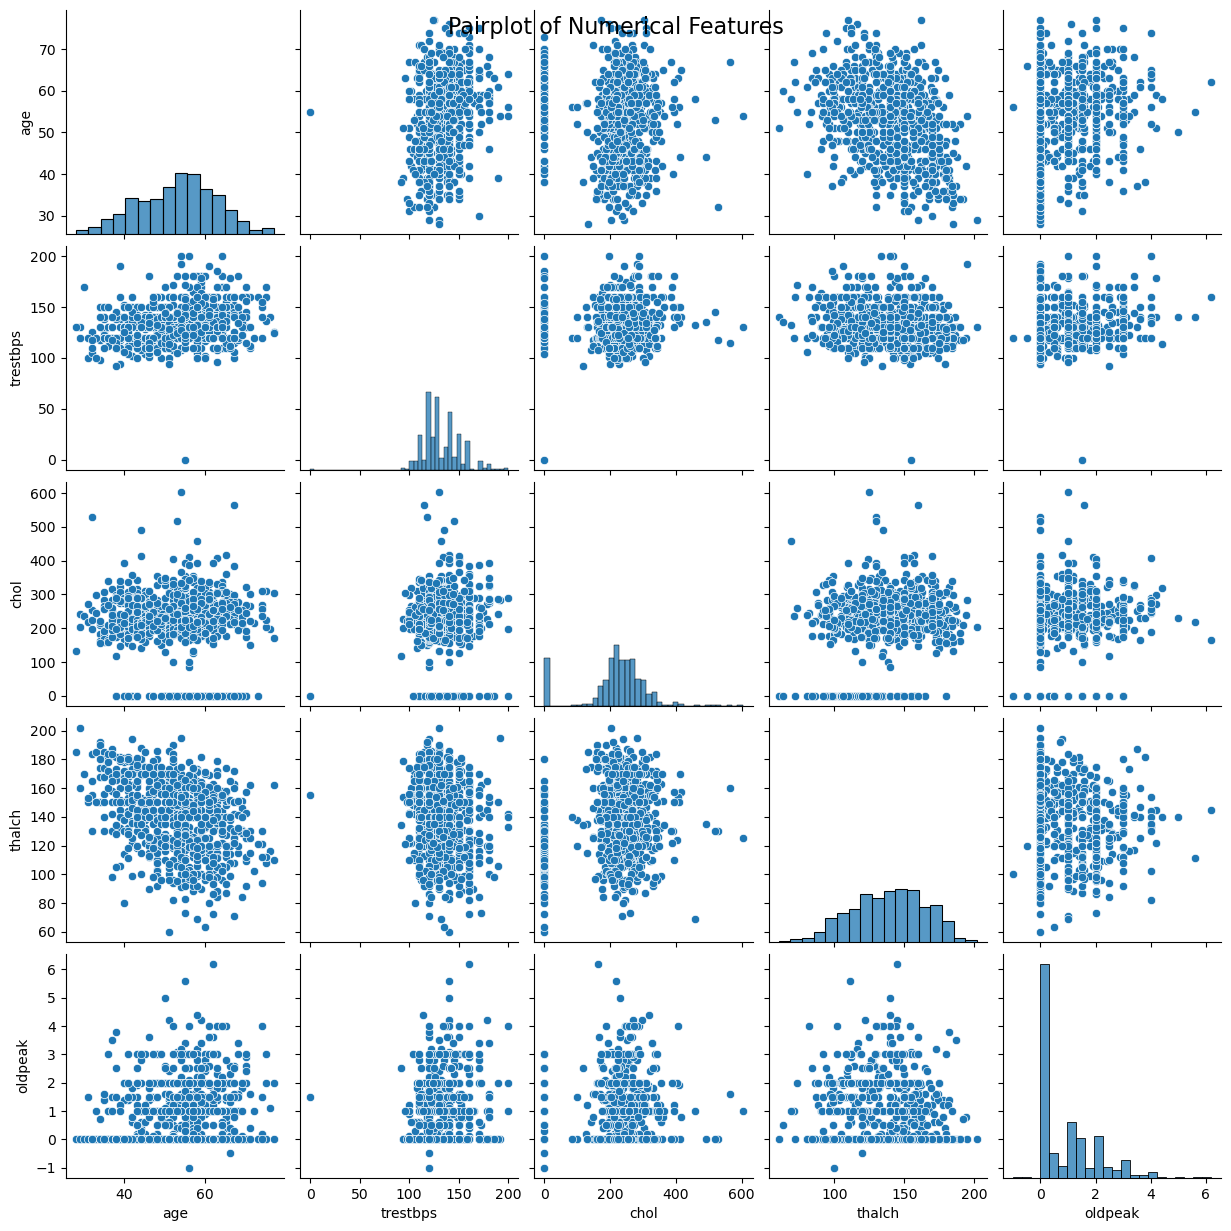

In [ ]:
# Pairplot for detailed relationships
print("Pairplot of All Numerical Features:")
sns.pairplot(df[numeric_features])
plt.suptitle('Pairplot of Numerical Features', fontsize=16)
plt.show()

Box Plots for Numerical Features to Check for Outliers:


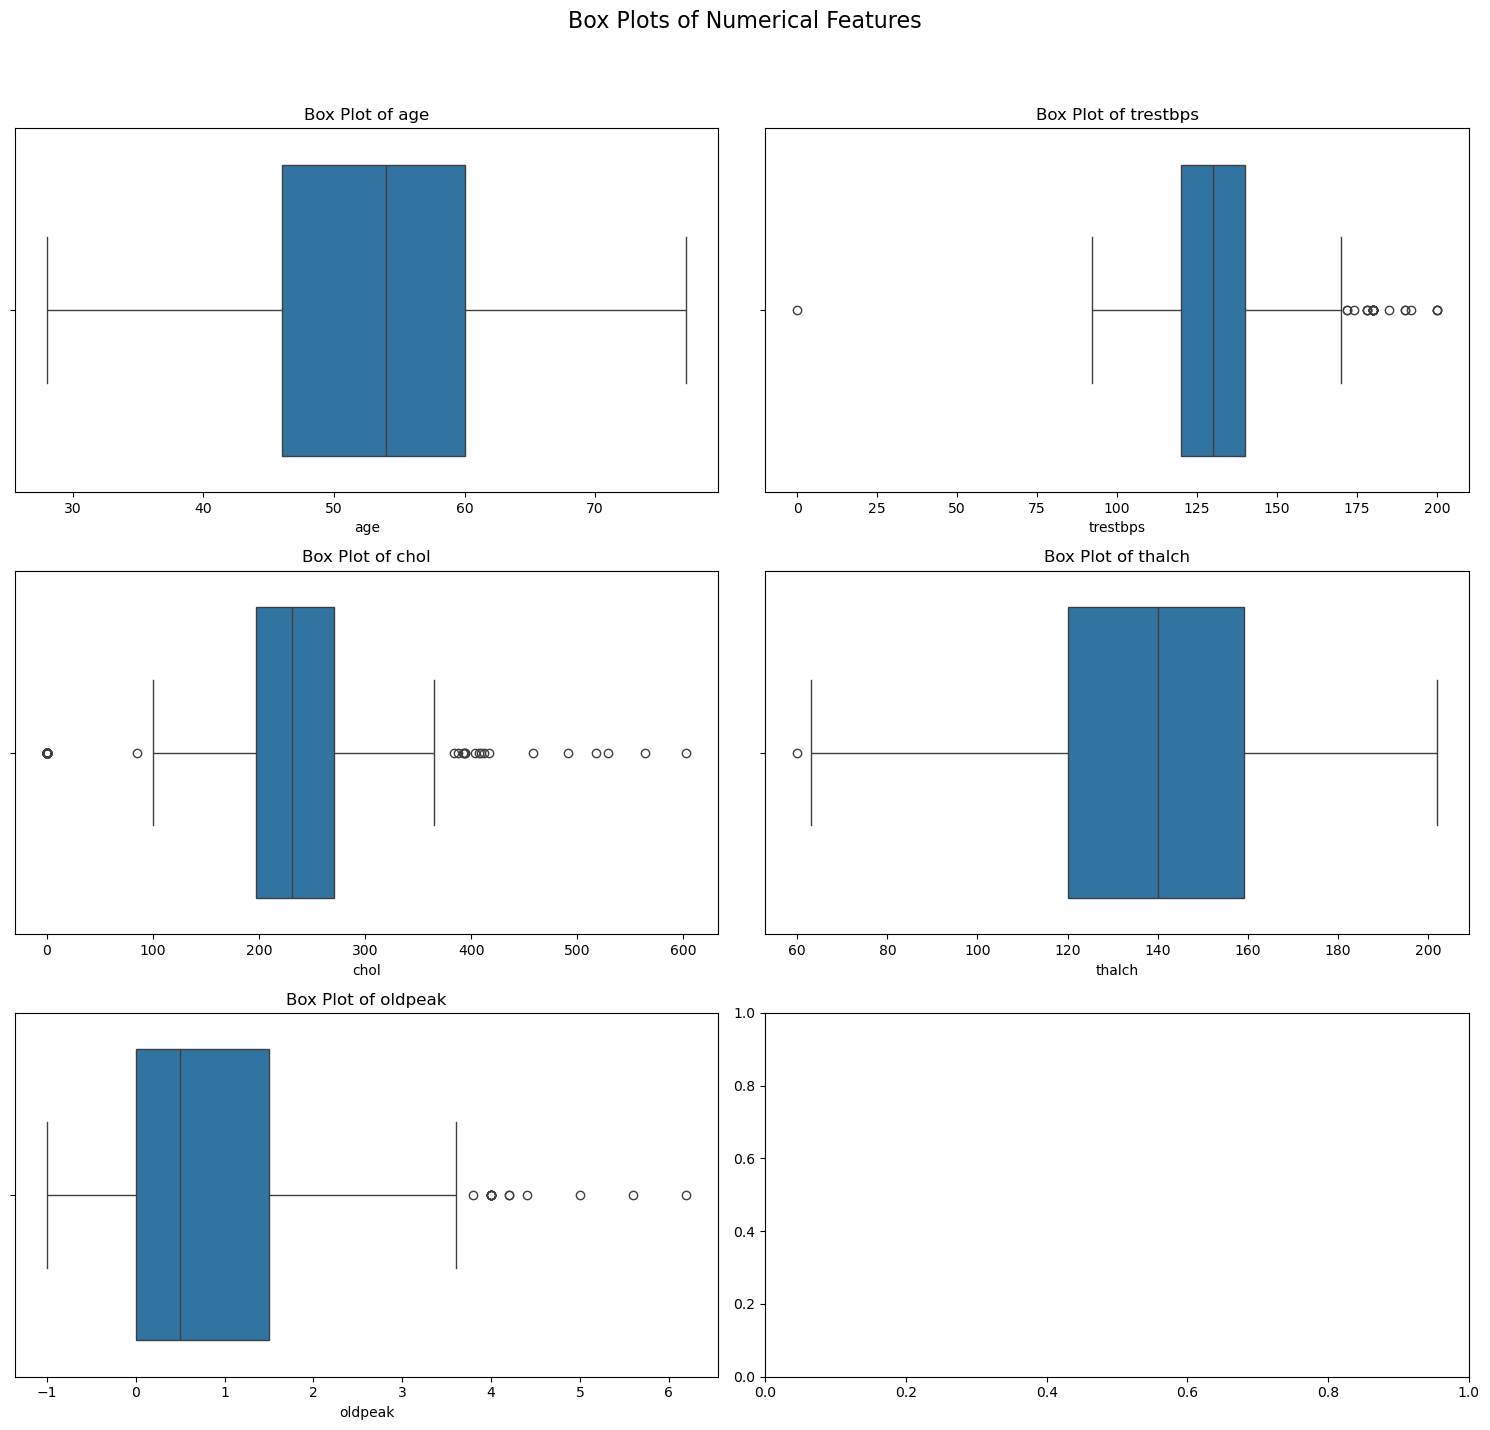

In [ ]:
# Box plots to check for outliers in numerical features
print("Box Plots for Numerical Features to Check for Outliers:")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axs = axs.flatten()
for ax, col in zip(axs, numeric_features):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')
plt.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Relationship Between Categorical Features and Target Variable:


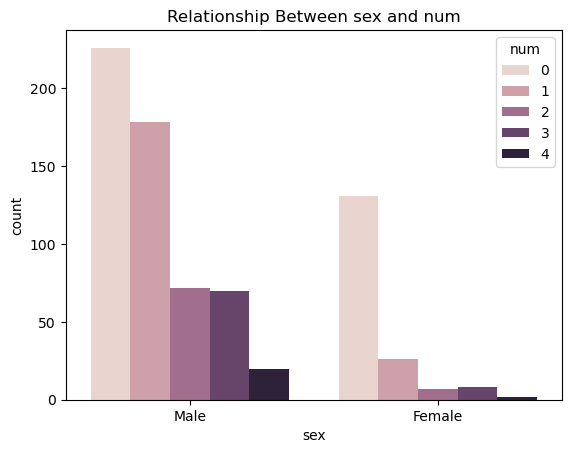

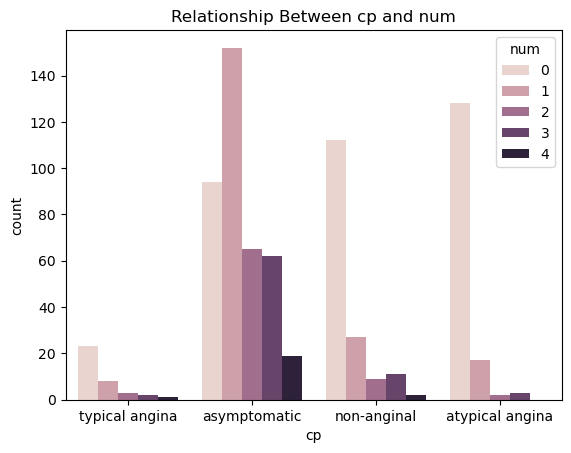

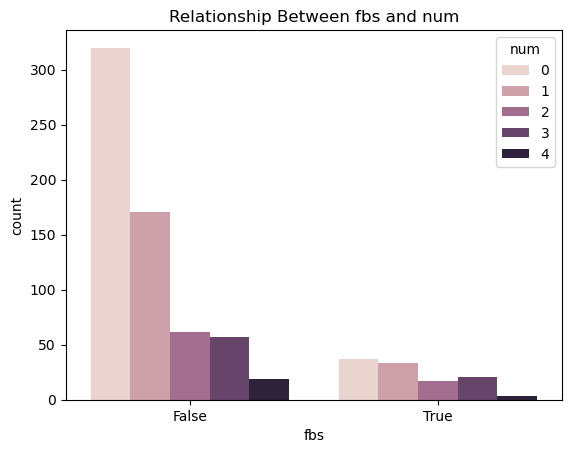

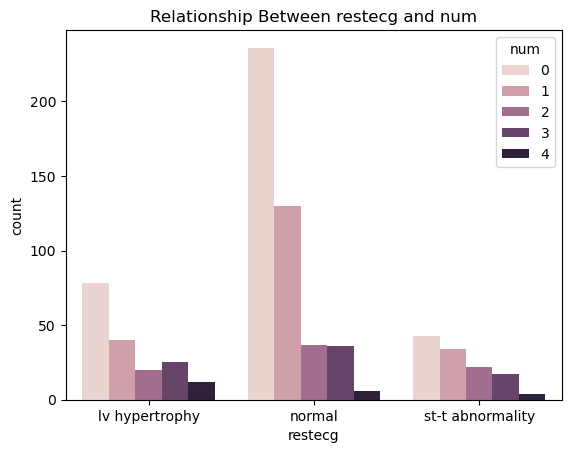

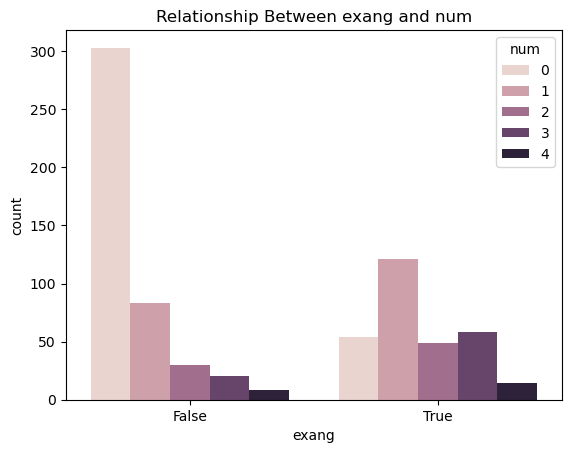

In [ ]:
# Relationship between categorical features and target variable
print("Relationship Between Categorical Features and Target Variable:")
target_variable = 'num'
for col in categorical_features:
    sns.countplot(data=df, x=col, hue=target_variable)
    plt.title(f'Relationship Between {col} and {target_variable}')
    plt.show()

In [ ]:
#Exploring the age coloumn
df.age.unique()


array([63., 67., 37., 41., 56., 62., 57., 53., 44., 52., 48., 54., 49.,
       64., 58., 60., 50., 66., 43., 40., 69., 59., 42., 55., 61., 65.,
       71., 51., 46., 45., 39., 68., 47., 34., 35., 29., 70., 77., 38.,
       74., 76., 28., 30., 31., 32., 33., 36., 73., 72., 75.])

In [ ]:
df.age.describe()


count    740.000000
mean      53.097297
std        9.408127
min       28.000000
25%       46.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

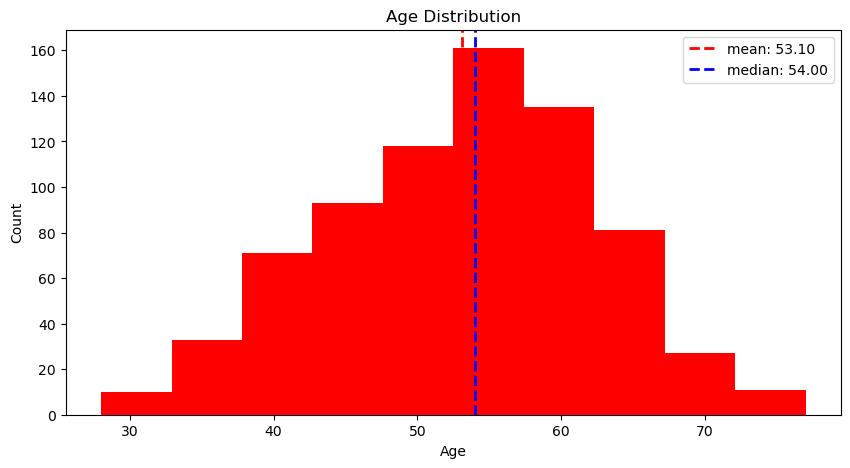

In [ ]:
# draw a histogram to see the distribution of age

mean_age = df['age'].mean()
median_age = df['age'].median()

df.age.plot(kind='hist' ,color='red', figsize=(10, 5))
mean_line = plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=2)
median_line = plt.axvline(df['age'].median(), color='blue', linestyle='dashed', linewidth=2)
# Adding legend
plt.legend(handles=[mean_line, median_line], labels=[f'mean: {mean_age:.2f}', f'median: {median_age:.2f}'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
#exploring the sex based distribution of age column
#checking unique value
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#value count in sex column
df.sex.value_counts()

sex
Male      566
Female    174
Name: count, dtype: int64

In [ ]:
#female and male percentage in our dataset
male_percentage = df.sex.value_counts()[0]/df.shape[0]*100
print(f'Male percentage in our data {male_percentage:.2f}%')


Male percentage in our data 76.49%


In [ ]:
# percentage of feamle in our dataset
female_percentage = df[df['sex']=='Female']['sex'].count() / len(df)*100

print(f'Female percentage in our data {female_percentage:.2f}%')

Female percentage in our data 23.51%


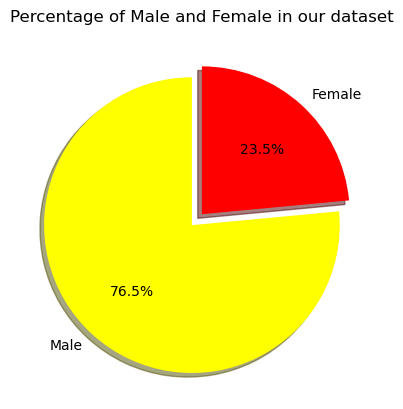

In [ ]:
#Pie chart
import matplotlib.pyplot as plt
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['yellow', 'red']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Percentage of Male and Female in our dataset')

plt.show()

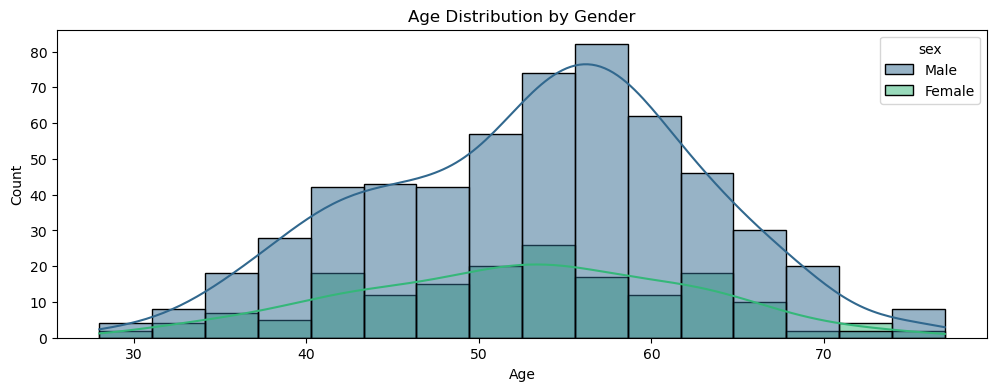

In [ ]:
# Combine one-hot encoded columns back into a single 'sex' column
if 'sex_female' in df.columns and 'sex_male' in df.columns:
    df['sex'] = df.apply(lambda row: 'Female' if row['sex_female'] == 1 else 'Male', axis=1)

# Plotting the histogram of age with respect to sex
if 'age' in df.columns and 'sex' in df.columns:
    plt.figure(figsize=(12, 4))
    sns.histplot(x='age', hue='sex', data=df, kde=True, palette='viridis')
    plt.title('Age Distribution by Gender')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
else:
    print("The required columns 'age' and 'sex' do not exist in the dataset.")

In [ ]:
# lets groupby sex with age to get value counts
df.groupby('sex')['age'].value_counts()

sex     age 
Female  54.0    14
        51.0    10
        62.0     8
        43.0     8
        55.0     7
                ..
Male    71.0     1
        72.0     1
        33.0     1
        28.0     1
        31.0     1
Name: count, Length: 90, dtype: int64

In [ ]:
# checking the exact name of the columns

df.columns


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'num'],
      dtype='object')

In [ ]:
# getting unique values of dataset column

df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [ ]:

# checking the contribution of each dataset in our dataframe

df['dataset'].value_counts()


dataset
Cleveland        304
Hungary          260
VA Long Beach    130
Switzerland       46
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['sex'], df['dataset'])

dataset,Cleveland,Hungary,Switzerland,VA Long Beach
sex,,,,
Female,97,69,3,5
Male,207,191,43,125


In [ ]:
# grouping by sex , dataset
df.groupby(['sex' , 'dataset']).size()

sex     dataset      
Female  Cleveland         97
        Hungary           69
        Switzerland        3
        VA Long Beach      5
Male    Cleveland        207
        Hungary          191
        Switzerland       43
        VA Long Beach    125
dtype: int64

**Age distribution by dataset**

In [ ]:
# ploting age distribution by dataset
fig = px.histogram(data_frame=df, x='age'  , facet_col='dataset')
# adding title
fig.update_layout(title_text='Age Distribution by Dataset')
fig.show(renderer='iframe_connected')

In [ ]:
# the patient with age less than 30 belongs to which location

df[df['age']<30][['sex','dataset']].value_counts()

sex   dataset  
Male  Cleveland    2
      Hungary      1
Name: count, dtype: int64

In [ ]:
# the patient with age greater than 60 belongs to which location

df[df['age']>60][['sex','dataset']].value_counts()

sex     dataset      
Male    VA Long Beach    58
        Cleveland        45
Female  Cleveland        34
Male    Switzerland      15
        Hungary           6
Female  Hungary           2
        Switzerland       2
        VA Long Beach     2
Name: count, dtype: int64

In [ ]:
# The mean, median and mode of age column grouped by dataset column


df.groupby('dataset')['age'].agg(['mean', 'median' , pd.Series.mode]).round(2)

,mean,median,mode
dataset,,,
Cleveland,54.35,55.5,58.0
Hungary,47.85,49.0,54.0
Switzerland,56.67,56.5,"[56.0, 61.0]"
VA Long Beach,59.40,60.0,63.0


**Exploring cp(chest pain) column**

In [ ]:
df['cp'].unique()


array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [ ]:
# getting value count of cp column

df['cp'].value_counts()

cp
asymptomatic       392
non-anginal        161
atypical angina    150
typical angina      37
Name: count, dtype: int64

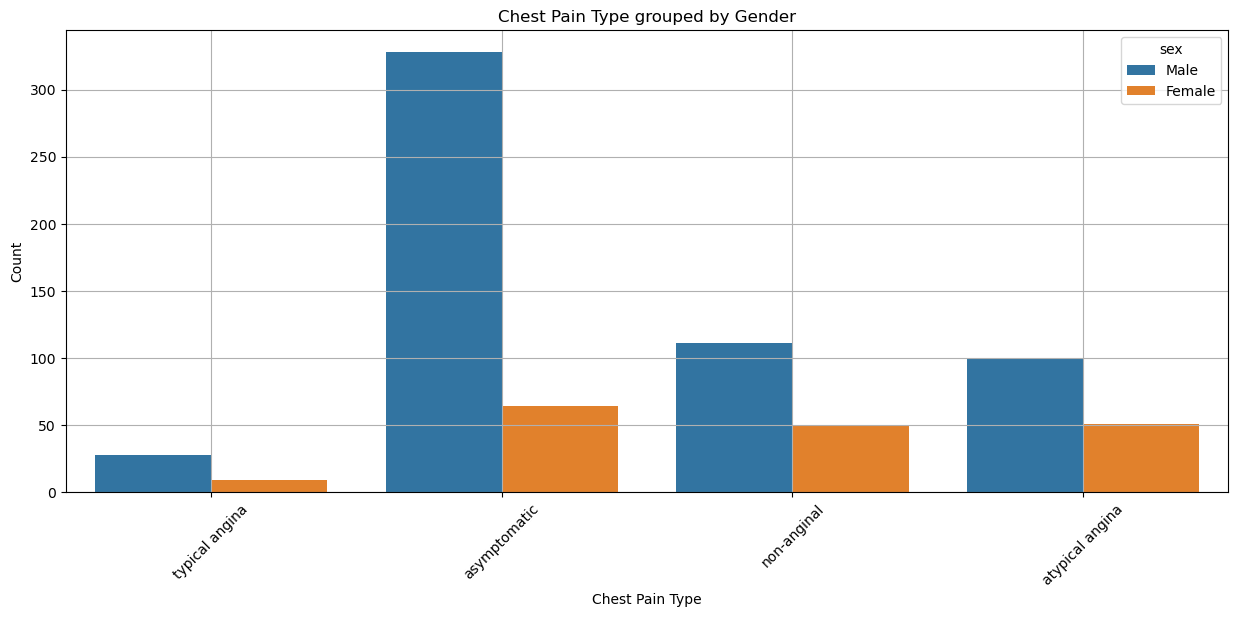

In [ ]:
# visualizing cp column grouped by sex

# defining figure size
plt.figure(figsize=(15,6))
# plotting countplot
sns.countplot(x='cp', hue='sex',data=df)

# adding title
plt.title('Chest Pain Type grouped by Gender')
# adding x and y label
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
# rotating x label
plt.xticks(rotation=45)
# adding grid
plt.grid('minor')
plt.show()

In [ ]:
pd.crosstab(df['cp'], df['sex'])


sex,Female,Male
cp,,
asymptomatic,64,328
atypical angina,51,99
non-anginal,50,111
typical angina,9,28


In [ ]:
# grouping by dataset and cp
pd.DataFrame(df.groupby(['dataset'])['cp'].value_counts())

count
dataset       cp                    
Cleveland     asymptomatic       144
              non-anginal         86
              atypical angina     51
              typical angina      23
Hungary       asymptomatic       113
              atypical angina     91
              non-anginal         46
              typical angina      10
Switzerland   asymptomatic        37
              non-anginal          7
              atypical angina      1
              typical angina       1
VA Long Beach asymptomatic        98
              non-anginal         22
              atypical angina      7
              typical angina       3

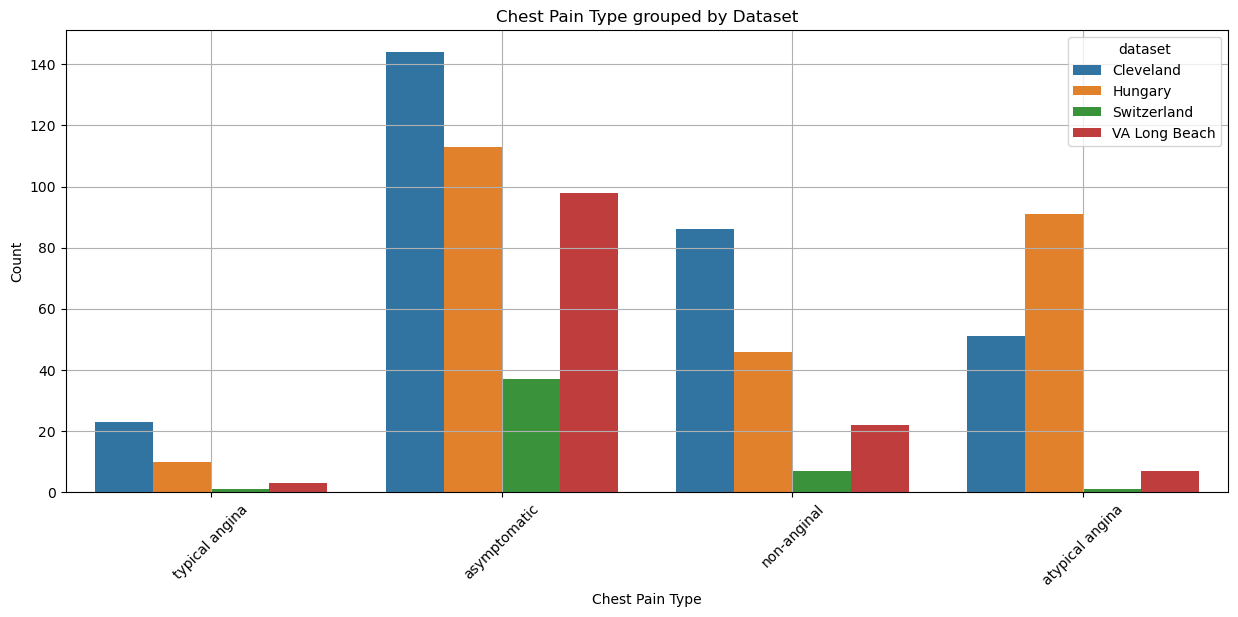

In [ ]:
# visualizing cp column grouped by dataset

# defining figure size
plt.figure(figsize=(15,6))
# plotting countplot
sns.countplot(x='cp', hue='dataset',data=df)

# adding title
plt.title('Chest Pain Type grouped by Dataset')
# adding x and y label
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
# rotating x label
plt.xticks(rotation=45)
# adding grid
plt.grid('minor')
plt.show()

In [ ]:
# defining a function for outlier treatment using z-score
def outlier_treatment(df , col):

    # Calculate the Z-scores for each value in the column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define the threshold for identifying outliers
    threshold = 3

    # identify rows where any column has a Z-score above the threshold
    outliers = (z_scores > threshold)

    # the number of rows identified as outliers
    print(f'Number of rows identified as outliers in {col}: {outliers.sum()}')

    # Remove the outliers
    df = df[~outliers]

    # print statement
    print('Z score has been successfully applied on {}.'.format(col))

    # returning the dataframe
    return df

In [ ]:
# applying outlier_treatment function on trestbps

df = outlier_treatment(df , 'trestbps')

Number of rows identified as outliers in trestbps: 7
Z score has been successfully applied on trestbps.


In [ ]:
# applying outlier_treatment function on chol

df = outlier_treatment(df , 'chol')

Number of rows identified as outliers in chol: 4
Z score has been successfully applied on chol.


In [ ]:
#scaling the data( Min max scaler)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63.0,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67.0,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67.0,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37.0,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41.0,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [ ]:
# selecting the column which needs to be scaled

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age' , 'trestbps' , 'chol' , 'thalch', 'oldpeak']

# scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))

# fitting the data to the scaler
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

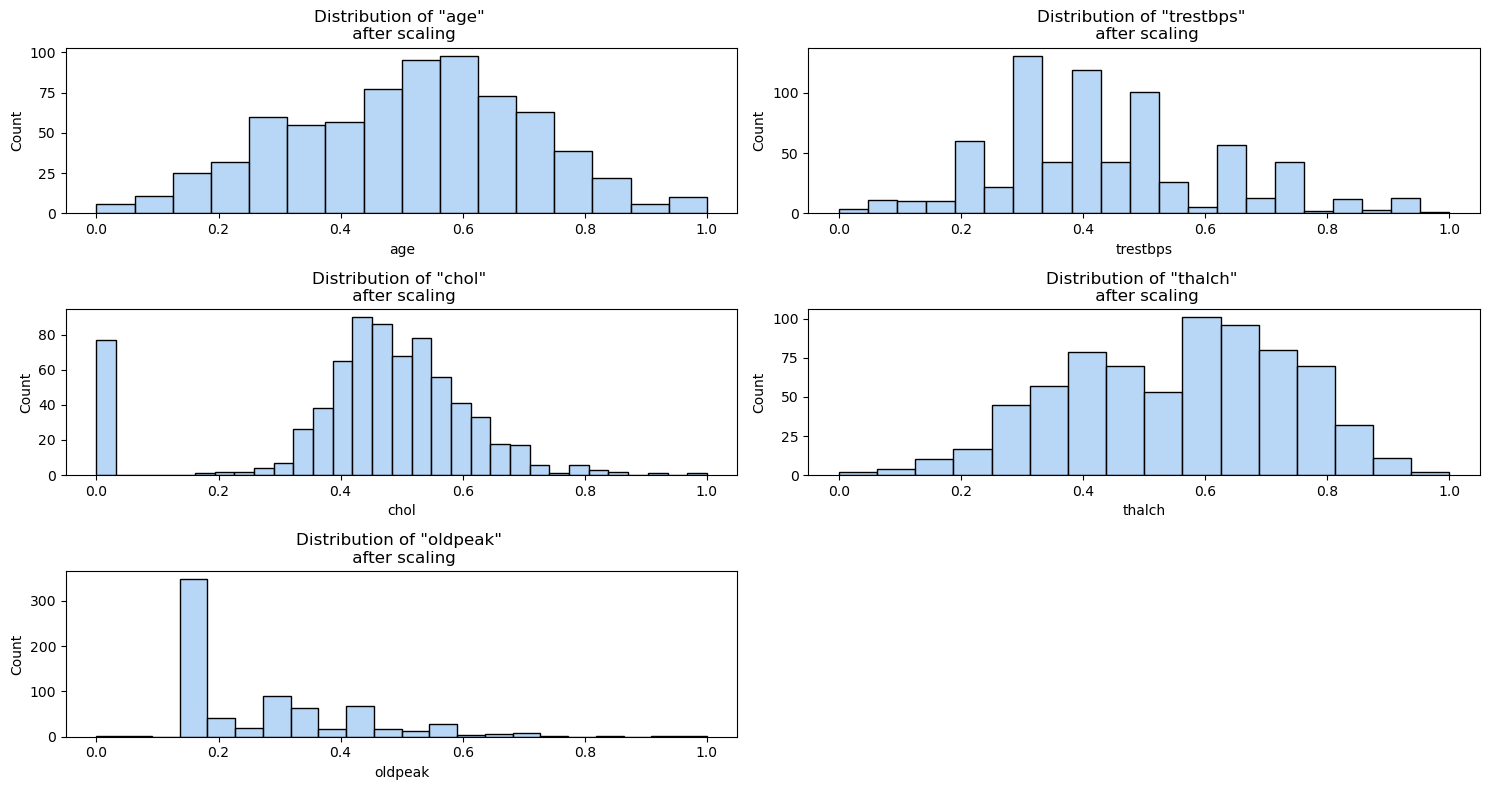

In [ ]:
#ploting the distribution of the scaled data
# list of specific columns
cols_to_scale = ['age' , 'trestbps' , 'chol' , 'thalch' , 'oldpeak']
# setting up the figure size
plt.figure(figsize=(15, 8))
# loop through each column
for i, col in enumerate(cols_to_scale):
    # create a subplot
    plt.subplot(3, 2,  i+1)
    # plotting the distribution
    sns.histplot(df[col], fill=True, color='#a1c9f4')
    # adding title
    plt.title(f'Distribution of "{col}" \n after scaling')

plt.tight_layout()
plt.show()

**Define Features and target**

In [ ]:
# Define features and target
X = df.drop(columns=['id', 'num'])
y = df['num'].apply(lambda x: 1 if x > 0 else 0)  # Convert to binary classification (0: no disease, 1: disease)



In [ ]:
# Encode target variable
target_variable = 'num'
df[target_variable] = df[target_variable].apply(lambda x: 1 if x > 0 else 0)  # Convert to binary classification

**Importing required libraries for Developing algorithm**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

**DATA PRE-PROCESSING**

In [ ]:
# Preprocessing pipeline
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


**SPLITTING THE DATASET**

In [ ]:
X = df[numeric_features + categorical_features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
# Evaluate models
auc_scores = {}
for model_name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Get probability estimates if possible
    if hasattr(clf, "predict_proba"):
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
        auc_scores[model_name] = auc
    else:
        # If model does not provide predict_proba, we can't calculate AUC
        auc_scores[model_name] = None

    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    if auc_scores[model_name] is not None:
        print(f"ROC AUC Score: {auc_scores[model_name]}")
    else:
        print("ROC AUC Score: Not available")
    print("-" * 40)

# Sort models by AUC score
sorted_auc_scores = sorted(auc_scores.items(), key=lambda x: (x[1] is not None, x[1]), reverse=True)

print("Models sorted by AUC score:")
for model_name, auc in sorted_auc_scores:
    if auc is not None:
        print(f"{model_name}: {auc:.4f}")
    else:
        print(f"{model_name}: AUC not available")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        79
           1       0.78      0.79      0.79        67

    accuracy                           0.80       146
   macro avg       0.80      0.80      0.80       146
weighted avg       0.80      0.80      0.80       146

Confusion Matrix:
[[64 15]
 [14 53]]
ROC AUC Score: 0.8736066502928396
----------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.70      0.71      0.70        79
           1       0.65      0.64      0.65        67

    accuracy                           0.68       146
   macro avg       0.68      0.68      0.68       146
weighted avg       0.68      0.68      0.68       146

Confusion Matrix:
[[56 23]
 [24 43]]
ROC AUC Score: 0.6753259021348951
----------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

**Final Decision**
random Forest: Generally provides a good balance between performance and interpretability, especially for datasets with mixed types of features and potential nonlinear relationships. Its ability to provide feature importance is also valuable for understanding the impact of each attribute on the prediction.

In [ ]:
#**Comparison of the 5 Classifiers**
#To determine which model is the most effective, we need to look at a combination of several metrics: accuracy, precision, recall, f1-score, and ROC AUC score. Each of these metrics provides different insights into the performance of the model:

#Accuracy: Indicates how often the classifier is correct.
#Precision: Measures how many of the positive predictions were actually correct.
#Recall: Measures how many of the actual positives were captured by the model.
#F1-Score: A weighted average of precision and recall, providing a balance between the two.
#ROC AUC Score: Indicates how well the model can distinguish between the two classes (0 and 1). A higher score means better performance.

In [ ]:
#Random Forest
#Accuracy: 81%
#Precision: 0.84 (Class 0), 0.77 (Class 1)
#Recall: 0.80 (Class 0), 0.82 (Class 1)
#F1-Score: 0.82 (Class 0), 0.80 (Class 1)
#ROC AUC Score: 0.8828 (Highest)
#Analysis: The Random Forest model performed the best overall, with the highest ROC AUC score of 0.8828, indicating strong performance in distinguishing between classes. Its accuracy, precision, and recall are also relatively high.

#Support Vector Machine (SVM)
#Accuracy: 82%
#Precision: 0.86 (Class 0), 0.78 (Class 1)
#Recall: 0.80 (Class 0), 0.85 (Class 1)
#F1-Score: 0.83 (Class 0), 0.81 (Class 1)
#ROC AUC Score: 0.8761
#Analysis: The SVM model also performed very well, with a slightly lower ROC AUC score than Random Forest. It had the highest accuracy (82%) and strong precision and recall, making it a very competitive model.

#Logistic Regression
#Accuracy: 80%
#Precision: 0.82 (Class 0), 0.78 (Class 1)
#Recall: 0.81 (Class 0), 0.79 (Class 1)
#F1-Score: 0.82 (Class 0), 0.79 (Class 1)
#ROC AUC Score: 0.8736
#Analysis: Logistic Regression performed consistently across all metrics, with a good ROC AUC score and balanced precision and recall. It's a solid model, especially for its simplicity.

#K-Nearest Neighbors (KNN)
#Accuracy: 78%
#Precision: 0.82 (Class 0), 0.74 (Class 1)
#Recall: 0.76 (Class 0), 0.81 (Class 1)
#F1-Score: 0.79 (Class 0), 0.77 (Class 1)
#ROC AUC Score: 0.8627
#Analysis: KNN has decent performance, with a slightly lower ROC AUC score and accuracy compared to the previous models. It still provides reasonable precision and recall, making it a viable option, though not the top performer.

#Decision Tree
#Accuracy: 68% (Lowest)
#Precision: 0.70 (Class 0), 0.65 (Class 1)
#Recall: 0.71 (Class 0), 0.64 (Class 1)
#F1-Score: 0.70 (Class 0), 0.65 (Class 1)
#ROC AUC Score: 0.6753 (Lowest)
#Analysis: The Decision Tree model performed the weakest among the five, with the lowest accuracy and ROC AUC score. It struggled with precision and recall, indicating that it may not be the best choice for this dataset.

In [ ]:
#Conclusion
#Best Performer: The Random Forest model is the most effective classifier in this case, achieving the highest ROC AUC score and solid performance across all metrics.
#Runner-up: The Support Vector Machine (SVM) is close behind, with excellent accuracy and nearly comparable ROC AUC score.
#Good Alternative: Logistic Regression is also a strong contender, especially considering its simplicity and ease of interpretation.
#The other models, K-Nearest Neighbors and Decision Tree, did not perform as well in comparison, making them less ideal for this specific dataset and problem.